In [1]:
stock prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Dataset

In [2]:
apple_training_complete = pd.read_csv(r'C:\Users\DELL\Desktop\apple_training.csv')
apple_training_complete

Date        Open        High         Low       Close   Adj Close  \
0    02/01/2018  170.160004  172.300003  169.259995  172.259995  166.353714   
1    03/01/2018  172.529999  174.550003  171.960007  172.229996  166.324722   
2    04/01/2018  172.539993  173.470001  172.080002  173.029999  167.097290   
3    05/01/2018  173.440002  175.369995  173.050003  175.000000  168.999741   
4    08/01/2018  174.350006  175.610001  173.929993  174.350006  168.372040   
..          ...         ...         ...         ...         ...         ...   
581  24/04/2020  277.200012  283.010010  277.000000  282.970001  282.206085   
582  27/04/2020  281.799988  284.540009  279.950012  283.170013  282.405548   
583  28/04/2020  285.079987  285.829987  278.200012  278.579987  277.827911   
584  29/04/2020  284.730011  289.670013  283.890015  287.730011  286.953247   
585  30/04/2020  289.959991  294.529999  288.350006  293.799988  293.006836   

       Volume  
0    25555900  
1    29517900  
2    22434600  
3    23660000  
4    20567800  
..        ...  
581  31627200  
582  29271900  
583  28001200  
584  34320200  
585  45457600  

[586 rows x 7 columns]

In [3]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values


# Data Normalization

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [5]:
features_set = []
labels = []
for i in range(60, 586):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [6]:
features_set, labels = np.array(features_set), np.array(labels)

In [7]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape 

(526, 60, 1)

# Training The LSTM

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
model = Sequential()

In [11]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [13]:
model.add(Dropout(0.2))

In [14]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

## Creating Dense Layer

In [15]:
model.add(Dense(units = 1))

## Model Compilation

In [16]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Algorithm Training

In [17]:
model.fit(features_set, labels, epochs = 50, batch_size = 20)

Epoch 1/50
526/526 [==============================] - 11s 21ms/step - loss: 0.0551
Epoch 2/50
526/526 [==============================] - 8s 15ms/step - loss: 0.0117
Epoch 3/50
526/526 [==============================] - 8s 15ms/step - loss: 0.0091
Epoch 4/50
526/526 [==============================] - 8s 15ms/step - loss: 0.0087
Epoch 5/50
526/526 [==============================] - 8s 15ms/step - loss: 0.0084
Epoch 6/50
526/526 [==============================] - 8s 15ms/step - loss: 0.0071
Epoch 7/50
526/526 [==============================] - 8s 15ms/step - loss: 0.0057
Epoch 8/50
526/526 [==============================] - 12s 22ms/step - loss: 0.0063
Epoch 9/50
526/526 [==============================] - 10s 19ms/step - loss: 0.0064
Epoch 10/50
526/526 [==============================] - 8s 14ms/step - loss: 0.0050
Epoch 11/50
526/526 [==============================] - 8s 15ms/step - loss: 0.0049
Epoch 12/50
526/526 [==============================] - 8s 14ms/step - loss: 0.0055
Epoch 13/5

# Testing our LSTM

In [18]:
apple_testing_complete = pd.read_csv(r'C:\Users\DELL\Desktop\apple_testing.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2]
apple_testing_processed

Open
0   286.250000
1   289.170013
2   295.059998
3   300.459991
4   303.220001
5   305.640015
6   308.100006
7   317.829987
8   312.149994
9   304.510010
10  300.350006
11  313.170013
12  315.029999
13  316.679993
14  318.660004
15  315.769989
16  323.500000
17  316.140015
18  316.769989
19  319.250000
20  317.750000
21  320.750000
22  324.660004
23  324.390015
24  323.350006
25  330.250000
26  332.140015
27  347.899994
28  349.309998

## Converting Test Data to Right Format

In [19]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

In [21]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values
test_inputs.shape

(89,)

In [22]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [23]:
test_features = []
for i in range(60, 89):
    test_features.append(test_inputs[i-60:i, 0]) 

In [24]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
test_features.shape

(29, 60, 1)

Making Predictions


In [25]:
predictions = model.predict(test_features)


In [26]:
predictions = scaler.inverse_transform(predictions)
predictions

array([[289.54462],
       [289.70172],
       [290.17725],
       [291.06012],
       [292.4915 ],
       [294.52625],
       [297.10724],
       [300.10938],
       [303.59747],
       [307.2769 ],
       [310.59012],
       [313.03656],
       [314.78085],
       [316.07394],
       [317.14322],
       [318.14957],
       [319.053  ],
       [320.0035 ],
       [320.83615],
       [321.4279 ],
       [321.77805],
       [321.86633],
       [321.78394],
       [321.70956],
       [321.72885],
       [321.81674],
       [322.11444],
       [322.71365],
       [324.02795]], dtype=float32)

Finally, let's see how well did our algorithm predicted the future stock prices. Execute the following script:

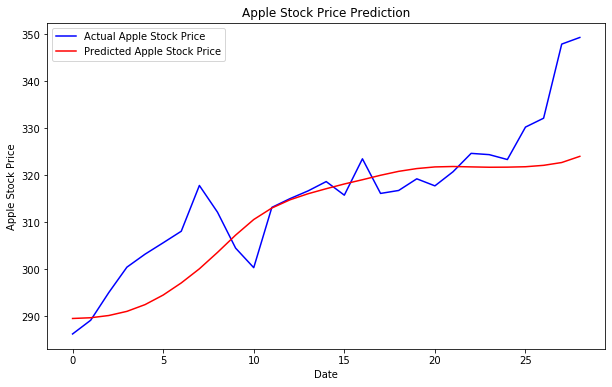

In [27]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

# Time Series Forecasting of stock prices

# Import all Libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Import Dataset of Apple stock price

In [35]:
#Importing dataset
df= pd.read_csv(r'C:\Users\DELL\Desktop\AAPL.csv')
df= df.iloc[:, 0:2]
df

Date        Open
0    02/01/2018  170.160004
1    03/01/2018  172.529999
2    04/01/2018  172.539993
3    05/01/2018  173.440002
4    08/01/2018  174.350006
..          ...         ...
610  05/06/2020  323.350006
611  08/06/2020  330.250000
612  09/06/2020  332.140015
613  10/06/2020  347.899994
614  11/06/2020  349.309998

[615 rows x 2 columns]

In [36]:
df.Date=pd.to_datetime(df.Date,format="%d/%m/%Y")
df=df.set_index('Date')
df.tail()

Open
Date                  
2020-06-05  323.350006
2020-06-08  330.250000
2020-06-09  332.140015
2020-06-10  347.899994
2020-06-11  349.309998

# Data Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

df_scaled = scaler.fit_transform(df)

# Convert Training Data to Right Shape

In [38]:
forecast_features_set = []
labels = []
for i in range(60, 615):
    forecast_features_set.append(df_scaled[i-60:i, 0])
    labels.append(df_scaled[i, 0])

In [39]:
forecast_features_set , labels = np.array(forecast_features_set ), np.array(labels)

In [40]:
forecast_features_set = np.reshape(forecast_features_set, (forecast_features_set.shape[0], forecast_features_set.shape[1], 1))
forecast_features_set.shape 

(555, 60, 1)

# Training The LSTM

In [41]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(forecast_features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(forecast_features_set, labels, epochs = 50, batch_size = 20)

Epoch 1/50
555/555 [==============================] - 10s 18ms/step - loss: 0.0406
Epoch 2/50
555/555 [==============================] - 7s 13ms/step - loss: 0.0111
Epoch 3/50
555/555 [==============================] - 8s 15ms/step - loss: 0.0093
Epoch 4/50
555/555 [==============================] - 8s 14ms/step - loss: 0.0074
Epoch 5/50
555/555 [==============================] - 8s 14ms/step - loss: 0.0067
Epoch 6/50
555/555 [==============================] - 7s 13ms/step - loss: 0.0064
Epoch 7/50
555/555 [==============================] - 7s 13ms/step - loss: 0.0050
Epoch 8/50
555/555 [==============================] - 7s 13ms/step - loss: 0.0044
Epoch 9/50
555/555 [==============================] - 7s 13ms/step - loss: 0.0054
Epoch 10/50
555/555 [==============================] - 7s 13ms/step - loss: 0.0045
Epoch 11/50
555/555 [==============================] - 7s 13ms/step - loss: 0.0042
Epoch 12/50
555/555 [==============================] - 7s 13ms/step - loss: 0.0038
Epoch 13/50


Now we make a funsction forecast list to store all values that is output values

In [51]:
forecast_list=[]

batch=df_scaled[-forecast_features_set.shape[1]:].reshape((1,forecast_features_set.shape[1],1))

for i in range(forecast_features_set.shape[1]):
    forecast_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:], [[forecast_list[i]]], axis=1)

In [52]:
df_predict=pd.DataFrame(scaler.inverse_transform(forecast_list),index=df[-forecast_features_set.shape[1]:].index, 
                        columns=["prediction"])

df_predict =pd.concat([df,df_predict],axis=1)
df_predict.tail()

Open  prediction
Date                              
2020-06-05  323.350006  302.095953
2020-06-08  330.250000  303.636893
2020-06-09  332.140015  305.165338
2020-06-10  347.899994  306.651388
2020-06-11  349.309998  308.135676

now we are going to add some furure dates for which we are trying to obtain forecasted stock price

In [53]:
from pandas.tseries.offsets import DateOffset
add_dates=[df.index[-1]+DateOffset(days=x) for x in range(0,61)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [54]:
future_dates.tail(60)

Open
2020-06-12  NaN
2020-06-13  NaN
2020-06-14  NaN
2020-06-15  NaN
2020-06-16  NaN
2020-06-17  NaN
2020-06-18  NaN
2020-06-19  NaN
2020-06-20  NaN
2020-06-21  NaN
2020-06-22  NaN
2020-06-23  NaN
2020-06-24  NaN
2020-06-25  NaN
2020-06-26  NaN
2020-06-27  NaN
2020-06-28  NaN
2020-06-29  NaN
2020-06-30  NaN
2020-07-01  NaN
2020-07-02  NaN
2020-07-03  NaN
2020-07-04  NaN
2020-07-05  NaN
2020-07-06  NaN
2020-07-07  NaN
2020-07-08  NaN
2020-07-09  NaN
2020-07-10  NaN
2020-07-11  NaN
2020-07-12  NaN
2020-07-13  NaN
2020-07-14  NaN
2020-07-15  NaN
2020-07-16  NaN
2020-07-17  NaN
2020-07-18  NaN
2020-07-19  NaN
2020-07-20  NaN
2020-07-21  NaN
2020-07-22  NaN
2020-07-23  NaN
2020-07-24  NaN
2020-07-25  NaN
2020-07-26  NaN
2020-07-27  NaN
2020-07-28  NaN
2020-07-29  NaN
2020-07-30  NaN
2020-07-31  NaN
2020-08-01  NaN
2020-08-02  NaN
2020-08-03  NaN
2020-08-04  NaN
2020-08-05  NaN
2020-08-06  NaN
2020-08-07  NaN
2020-08-08  NaN
2020-08-09  NaN
2020-08-10  NaN

we make a dataframe of forcasted values and store the forcasted stock price values in predction column

In [55]:
df_forecast=pd.DataFrame(scaler.inverse_transform(forecast_list),index=future_dates[-forecast_features_set.shape[1]:].index, 
                        columns=["prediction"])

df_forecast =pd.concat([df,df_forecast],axis=1)

In [56]:
df_forecast.tail(60)

Open  prediction
2020-06-12   NaN  323.956322
2020-06-13   NaN  326.171060
2020-06-14   NaN  327.960138
2020-06-15   NaN  329.067562
2020-06-16   NaN  329.442333
2020-06-17   NaN  329.243725
2020-06-18   NaN  328.626189
2020-06-19   NaN  327.672727
2020-06-20   NaN  326.498565
2020-06-21   NaN  325.138646
2020-06-22   NaN  323.639403
2020-06-23   NaN  321.971340
2020-06-24   NaN  320.141678
2020-06-25   NaN  318.176621
2020-06-26   NaN  316.101097
2020-06-27   NaN  313.975787
2020-06-28   NaN  311.700946
2020-06-29   NaN  309.353982
2020-06-30   NaN  306.927247
2020-07-01   NaN  304.509079
2020-07-02   NaN  302.077375
2020-07-03   NaN  299.673208
2020-07-04   NaN  297.276286
2020-07-05   NaN  294.886095
2020-07-06   NaN  292.560047
2020-07-07   NaN  290.315729
2020-07-08   NaN  288.210172
2020-07-09   NaN  286.258111
2020-07-10   NaN  284.502799
2020-07-11   NaN  282.950832
2020-07-12   NaN  281.588502
2020-07-13   NaN  280.471581
2020-07-14   NaN  279.537566
2020-07-15   NaN  278.846745
2020-07-16   NaN  278.424035
2020-07-17   NaN  278.259071
2020-07-18   NaN  278.319994
2020-07-19   NaN  278.592965
2020-07-20   NaN  279.065278
2020-07-21   NaN  279.775754
2020-07-22   NaN  280.586538
2020-07-23   NaN  281.481377
2020-07-24   NaN  282.481946
2020-07-25   NaN  283.690693
2020-07-26   NaN  285.002576
2020-07-27   NaN  286.398696
2020-07-28   NaN  287.865899
2020-07-29   NaN  289.363356
2020-07-30   NaN  290.941771
2020-07-31   NaN  292.504398
2020-08-01   NaN  294.090891
2020-08-02   NaN  295.700196
2020-08-03   NaN  297.302427
2020-08-04   NaN  298.910582
2020-08-05   NaN  300.517575
2020-08-06   NaN  302.095953
2020-08-07   NaN  303.636893
2020-08-08   NaN  305.165338
2020-08-09   NaN  306.651388
2020-08-10   NaN  308.135676

now we make a plot of past values and forecasted values. execute the script below

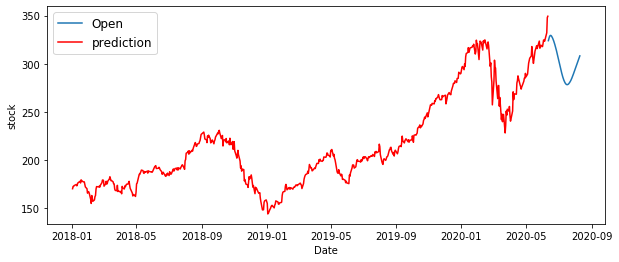

In [59]:
plt.figure(figsize=(10,4))
plt.plot(df_forecast.index,df_forecast["prediction"],label="Open")
plt.plot(df_predict.index,df_predict["Open"],color="r",label="prediction")
plt.legend(loc='best',fontsize='large')
plt.xlabel("Date")
plt.ylabel("stock")
plt.show()